# Prb Statement - Predicting the person is diabetic or not .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

# Seperating X and Y

In [5]:
X = df.drop(['Outcome'],axis=1)

In [6]:
Y= df['Outcome']

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

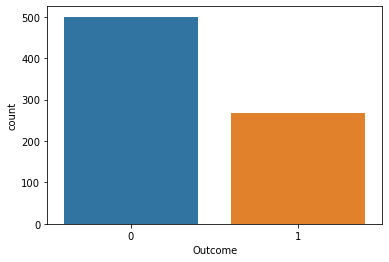

In [7]:
sns.countplot(Y) 
# Count of male and Female is same

# Checking data Types of the features

In [8]:
X.dtypes          # All numeric data 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

# Checking for null or missing value

In [9]:
X.isnull().sum()           # No Missing Value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Checking for outliers

In [10]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000


In [11]:
def clipping(x):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

In [12]:
X=X.apply(lambda x : clipping(x))   

In [13]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.272135,69.053385,20.433125,78.604427,31.936031,0.468461,33.205729
std,3.336808,30.807518,19.243340,15.646206,109.425722,7.712781,0.314849,11.645318
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.095564,21.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000


# Removing Zero Variance Columns

In [14]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit_transform(X)
cols = var.get_support(indices=True)

# Scaling the data 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
Outcome_predicted = model.predict(X_test)

In [20]:
model.score(X_test,y_test)

0.7857142857142857

In [21]:
print("Accuracy of testing data--->",metrics.accuracy_score(y_test, Outcome_predicted))
print("Precision--->",metrics.precision_score(y_test, Outcome_predicted))
print("Recall--->",metrics.recall_score(y_test, Outcome_predicted))
print("f1_score--->",metrics.f1_score(y_test, Outcome_predicted))

Accuracy of testing data---> 0.7857142857142857
Precision---> 0.775
Recall---> 0.5636363636363636
f1_score---> 0.6526315789473685


# Area Under the Curve

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr,_= roc_curve(y_test, Outcome_predicted)
roc_auc= auc(fpr, tpr)

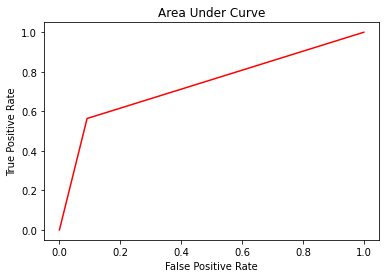

In [23]:
plt.plot(fpr, tpr, color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.show()

# Confusion metrics

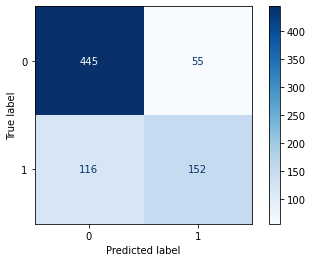

In [26]:
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(model,X,Y,cmap='Blues')

# Classification Report

In [27]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = Outcome_predicted
target_names = ['Diabetic', 'Non Diabetic']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetic       0.79      0.91      0.85        99
Non Diabetic       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

